In [2]:
###################################
# Plot paper4 figures
# 2024.8.2 originally written, updated on 2024.9.20
# Mu-Ting Chien
##############################

In [3]:
import os
import sys
sys.path.append('/glade/work/muting/function/')
#import KW_diagnostics as KW
import mjo_mean_state_diagnostics as MJO
import numpy as np
import matplotlib.pyplot as plt

In [33]:
dir_out            = '/glade/work/muting/KW/'
CASENAME_LIST2     = list(['SST_AQP3_Qobs_27_-4K',\
                          'SST_AQP3_Qobs_27',\
                          'SST_AQP3_Qobs_27_4K'])
CASENAME_LONG_LIST  = list(['3h_20y_CLUBB_new','3h_20y_CLUBB_new_uv_tendency','3h_20y_CLUBB_new'])
#figdir = dir_out+'figure/Post_general/Paper4/' #original directory
figdir = dir_out+'figure/Post_general/Paper4_20240822/' #updated directory
figdir_supplement = figdir+'Supplement/'
os.makedirs(figdir_supplement, exist_ok=True) 
#output_dir_all          = dir_out+'output_data/Paper4/' # original directory
#output_dir_all_3yr = dir_out+'output_data/All_3hr_3yr/' # original directory
output_dir_all          = dir_out+'output_data/Paper4_20240822/' # updated directory

#os.makedirs(figdir+'test/', exist_ok=True)
V2_name = list(['pr_kwproj_ano','PC1_Q'])
V1_short = list(['qv','T'])
V2_short = list(['pr','PCQ1'])
NUDGE_LIST = list(['3h_20y_CLUBB_new','3h_20y_CLUBB_new_uv_tendency','3h_20y_CLUBB_new'])
color_list = list(['darkblue','green','orangered'])

In [4]:
import os
import sys
sys.path.append('/glade/work/muting/function/')
#import KW_diagnostics as KW
#import mjo_mean_state_diagnostics as MJO
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load correlation coefficient between T and precip, q and precip (Fig. 2)
save_corr_q_PCQ1 = 1
if save_corr_q_PCQ1 == 0:
    for n1 in range(0, np.size(V1_short)):
        for n2 in range(1, np.size(V2_short)):
            for icase in range(0, 3):
                CASENAME       = CASENAME_LIST2[icase]+'_'+NUDGE_LIST[icase]
                output_dir     = dir_out+'output_data/'+CASENAME+'/'
                data = np.load(output_dir+'corrcoef_'+V1_short[n1]+'_'+V2_short[n2]+'_level.npz')
                if icase == 0:
                    plev_r = data['plev']
                    nlev_r = np.size(plev_r)
                    if n1 == 0:
                        r_q = np.empty([nlev_r, 3])
                    elif n1 == 1:
                        r_T = np.empty([nlev_r, 3])
                if n1 == 0:
                    r_q[:,icase] = data['r']
                elif n1 == 1:
                    r_T[:,icase] = data['r']
    
    np.savez(output_dir_all+'Corrcoef_PCQ1_q_T.npz', r_PCQ1_q=r_q, r_PCQ1_T=r_T, plev=plev_r)
else:
    data = np.load(output_dir_all+'Corrcoef_PCQ1_q_T.npz')
    r_q = data['r_PCQ1_q']
    r_T = data['r_PCQ1_T']

In [35]:
# Load EOF profile (Fig. 2)
save_eof = 0
if save_eof == 0:
    for icase in range(0,3):
        CASENAME       = CASENAME_LIST2[icase]+'_'+NUDGE_LIST[icase]
        output_dir     = dir_out+'output_data/'+CASENAME+'/'
        data = np.load(output_dir+'EOF.npz')
        plev = data['plev']
        #plev = plev[ilevmin:ilevmax+1]
        nlev = np.size(plev)
        if icase == 0:
            EOF1 = np.empty([nlev, 3])
            EOF2 = np.empty([nlev, 3])
        EOF1[:,icase] = data['R_EOF1_smooth'][:]#[ilevmin:ilevmax+1]
        EOF2[:,icase] = data['R_EOF2_smooth'][:]#[ilevmin:ilevmax+1]
    
    np.savez(output_dir_all+'EOF_all.npz', EOFQ1=EOF1, EOFQ2=EOF2, plev=plev)
else:
    data = np.load(output_dir_all+'EOF_all.npz')
    EOF1 = data['EOFQ1']
    EOF2 = data['EOFQ2']
    plev = data['plev']

In [7]:
# Load relative magnitude for KW composite (Fig. 11)
data = np.load(output_dir_all+'Coupling_relative_magnitude_each_process.npz') # originally in output_dir_3yr directory
qlf_KW_mag_rel       = data['qlf_KW_mag_rel']
wdqdp_lf_KW_mag_rel  = data['wdqdp_lf_KW_mag_rel']
w_lf_KW_mag_rel      = data['w_lf_KW_mag_rel']
T2_lf_KW_mag_rel     = data['T2_lf_KW_mag_rel']
ZMMU_lf_KW_mag_rel   = data['ZMMU_lf_KW_mag_rel']
Q_lf_KW_mag_rel      = data['Q_lf_KW_mag_rel']

In [11]:
#############################
# Load data for Fig. 12
####################################
save_pr_var = 1
if save_pr_var == 0:
    # Load variance of precip anomaly
    for icase in range(0, 3):
        CASENAME       = CASENAME_LIST2[icase]+'_'+CASENAME_LONG_LIST[icase]
        output_dir     = dir_out+'output_data/'+CASENAME+'/'
        # Load precip ano
        data          = np.load(output_dir+'precip_kw.npz')
        pr_ano        = data['pr_kwproj_ano_short'] # This is anomaly without 10-day low pass variabiltiy
        if icase == 0:
            pr_var = np.empty([3])
        pr_var[icase] = np.var(pr_ano)
    np.savez(output_dir_all+'Precip_kwproj_anomaly_variance.npz',pr_var=pr_var)
else:
    data = np.load(output_dir_all+'Precip_kwproj_anomaly_variance.npz')
    pr_var = data['pr_var']


# Load lag-plev regression 
data = np.load(output_dir_all+'DT_decomp_lag_plev.npz')
Qcond_lag_plev    = data['Qcond_lag_plev']
Q_ZM_lag_plev     = data['Q_ZM_lag_plev']
Q_CLUBB_lag_plev  = data['Q_CLUBB_lag_plev']
Q_MP_lag_plev     = data['Q_MP_lag_plev']
EVAPT_ZM_lag_plev = data['EVAPT_ZM_lag_plev']
xx   = data['xx']
yy   = data['yy']
lags = data['lags']
plev = data['plev']


# Load melting
data = np.load(output_dir_all+'ZM_MP_lag_plev.npz')
MELTSDT_lag_plev = data['MELTSDT_lag_plev']

In [10]:
# Load lag-plev regression projected onto EOF2 (Fig. 13)
data = np.load(output_dir_all+'DT_decomp_lag_plev_project-to-EOF.npz')
Q_ZM_lag_plev_EOF2     = data['Q_ZM_lag_plev_EOF2']
EVAPT_ZM_lag_plev_EOF2 = data['EVAPT_ZM_lag_plev_EOF2']
Q_CLUBB_lag_plev_EOF2  = data['Q_CLUBB_lag_plev_EOF2']
Q_MP_lag_plev_EOF2     = data['Q_MP_lag_plev_EOF2']
plev                   = data['plev']
lags                   = data['lags']

In [12]:
###############################
# Load data for Fig. 13 and 14 (CLUBB, MP vertical structure, EOF2, Tmean)
############################
save_melting_level = 0
if save_melting_level == 0:
    # 1. load mean state T
    for icase in range(0,3):
        if icase != 1:
            CASENAME       = CASENAME_LIST2[icase]+'_3h_20y_CLUBB_new'
        else:
            CASENAME       = CASENAME_LIST2[icase]+'_3h_20y_CLUBB_new_uv_tendency'
        output_dir = dir_out+'output_data/'+CASENAME+'/'
        data = np.load(output_dir+'QTUVZq.npz')
        plev_m = data['plev']
        nlev = np.size(plev_m)
        if icase == 0:
            Tm = np.empty([nlev, 3])
        Tm[:,icase] = data['Tm']-273.15
    
    # 2. Find melting level
    for icase in range(0,3):
        if icase == 0:
            ilev_melt = np.zeros([3]).astype('int')
        ilev_melt[icase] = int(np.argwhere(np.abs(Tm[:,icase])==np.min(np.abs(Tm[:,icase]))).squeeze())

    # Save output
    np.savez(output_dir_all+'Tm_melting_level.npz', Tm=Tm, plev = plev, ilev_melt=ilev_melt, plev_melt=plev_m[ilev_melt])
else:
    data = np.load(output_dir_all+'Tm_melting_level.npz')
    Tm = data['Tm']
    plev_m = data['plev']
    ilev_melt = data['ilev_melt']
print(plev_m[ilev_melt])

# 3. Load vertical structure of lag-regression (CLUBB, MP)
data = np.load(output_dir_all+'DT_decomp_lag_plev.npz')
lags = data['lags']
ilag0 = np.argwhere(lags==0).squeeze()
#Qcond_lag0_plev    = data['Qcond_lag_plev']
#Q_ZM_lag0_plev     = data['Q_ZM_lag_plev']
Q_CLUBB_lag0_plev  = data['Q_CLUBB_lag_plev'][ilag0,:,:]
Q_MP_lag0_plev     = data['Q_MP_lag_plev'][ilag0,:,:]
#EVAPT_ZM_lag0_plev = data['EVAPT_ZM_lag_plev']
xx   = data['xx']
yy   = data['yy']
plev = data['plev']

[650 575 525]


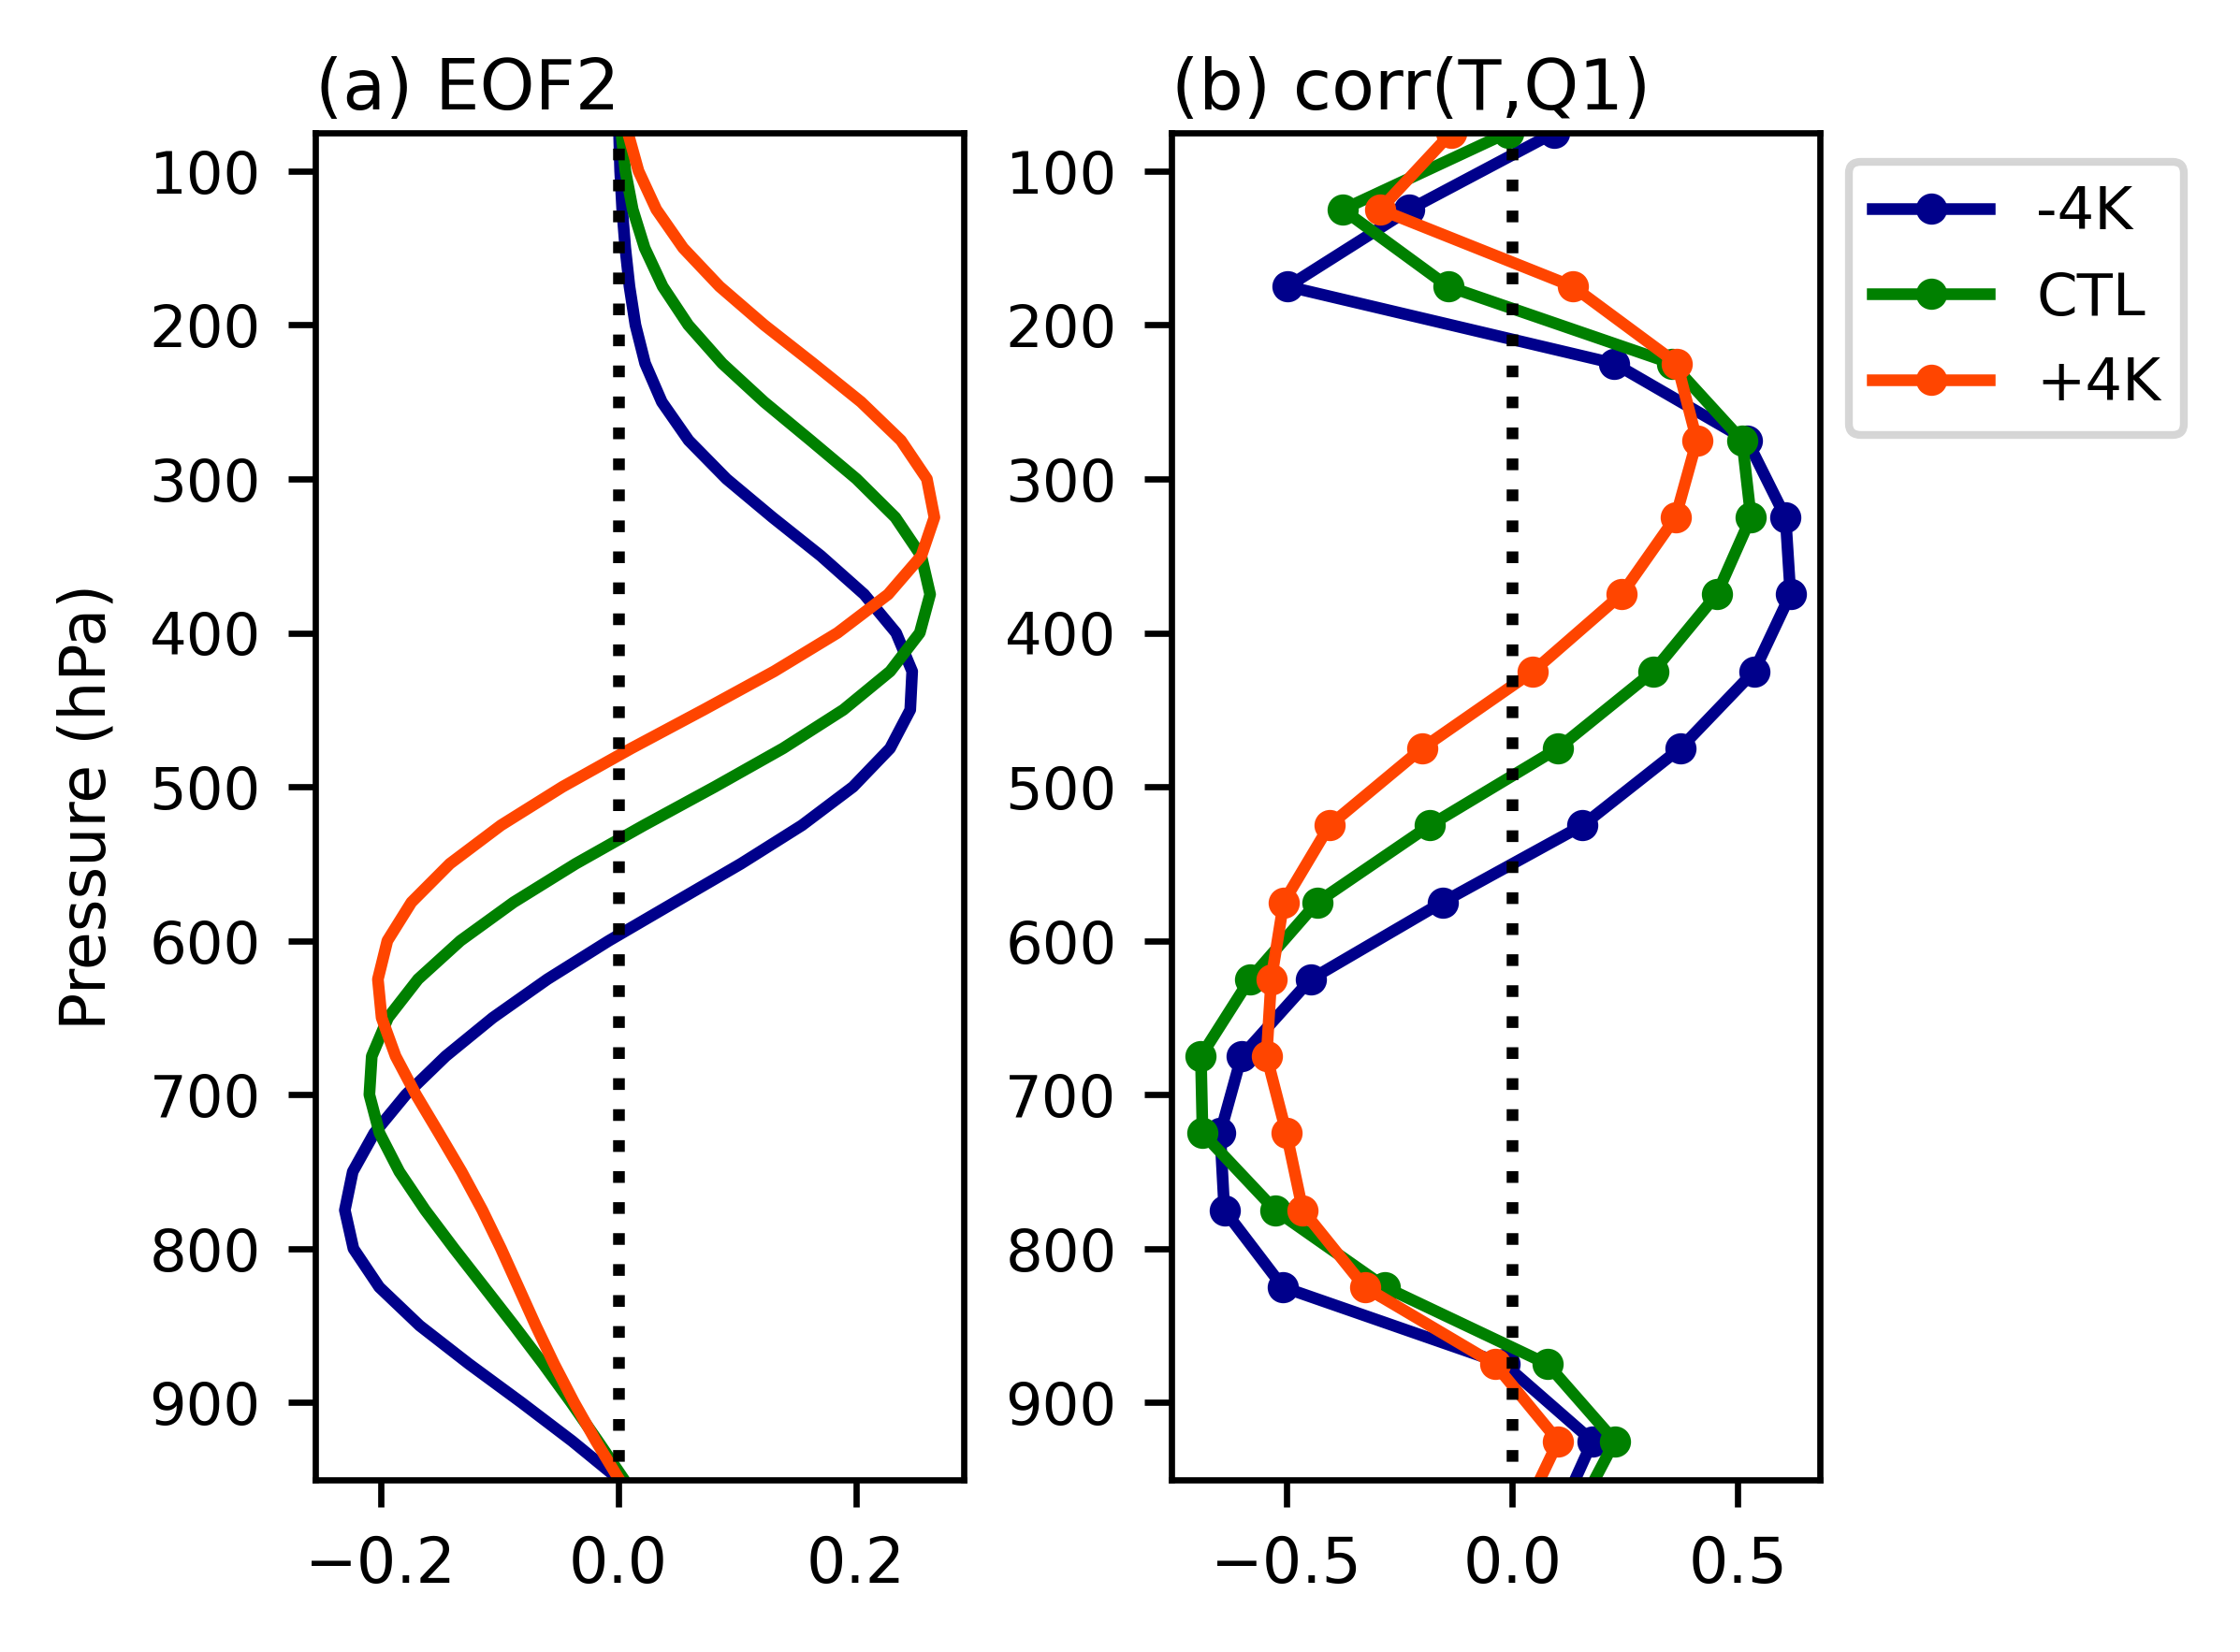

In [22]:
# Figure 2: plot EOF2 and corr(T, Q1) together
mark_melting_level = 0

title = list(['(a) EOF2','(b) corr(T,Q1)'])
vname = list(['EOF2','r_T'])
    
# Plot 2 figures together
font = 8
fig,axes = plt.subplots(1,2,figsize=(4, 3),dpi=600)
plt.subplots_adjust(left=0.15,right=0.82,top=0.9,bottom=0.1,wspace=0.32)
plt.rcParams.update({'font.size': font})
zero = np.zeros([nlev])
#plev_mid = (np.max(plev)+np.min(plev))/2

for iplt in range(0,2):
    plt.subplot(1,2,iplt+1)
    ax = plt.gca()
    V = globals()[vname[iplt]]
    for icase in range(0,3):
        if iplt == 0:
            plt.plot(V[:,icase], plev, color=color_list[icase])
        else:
            plt.plot(V[:,icase], plev_r, color=color_list[icase],marker='o',markersize='3')

    #plt.xlim([np.min(EOF2)*1.1, np.max(EOF1)*1.1])
    #plt.xticks(np.arange(-0.3,0.6,0.3))
    plt.plot(zero, plev,'k:')
    plt.tick_params(bottom=True,top=False,left=True,right=False)
    plt.ylim([75, 950]) 
    plt.yticks(np.arange(100,1000,100),fontsize=7.5)
    if iplt == 1:
        ax.legend(['-4K','CTL','+4K'],bbox_to_anchor=(1, 1), loc='upper left',fontsize=7.5)
    plt.gca().invert_yaxis()
    plt.title(title[iplt], pad=3, loc='left',fontsize=9)
    if iplt == 0:
        plt.ylabel('Pressure (hPa)')
    plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
    
    # Mark melting level:
    if mark_melting_level == 1:
        plt.plot( 0, plev[ilev_melt[icase]], 'gx',markersize=4)
    #
plt.savefig(figdir+'Fig.2_EOF2_corrT2Q1.png',dpi=600)
plt.show()

(6, 3)


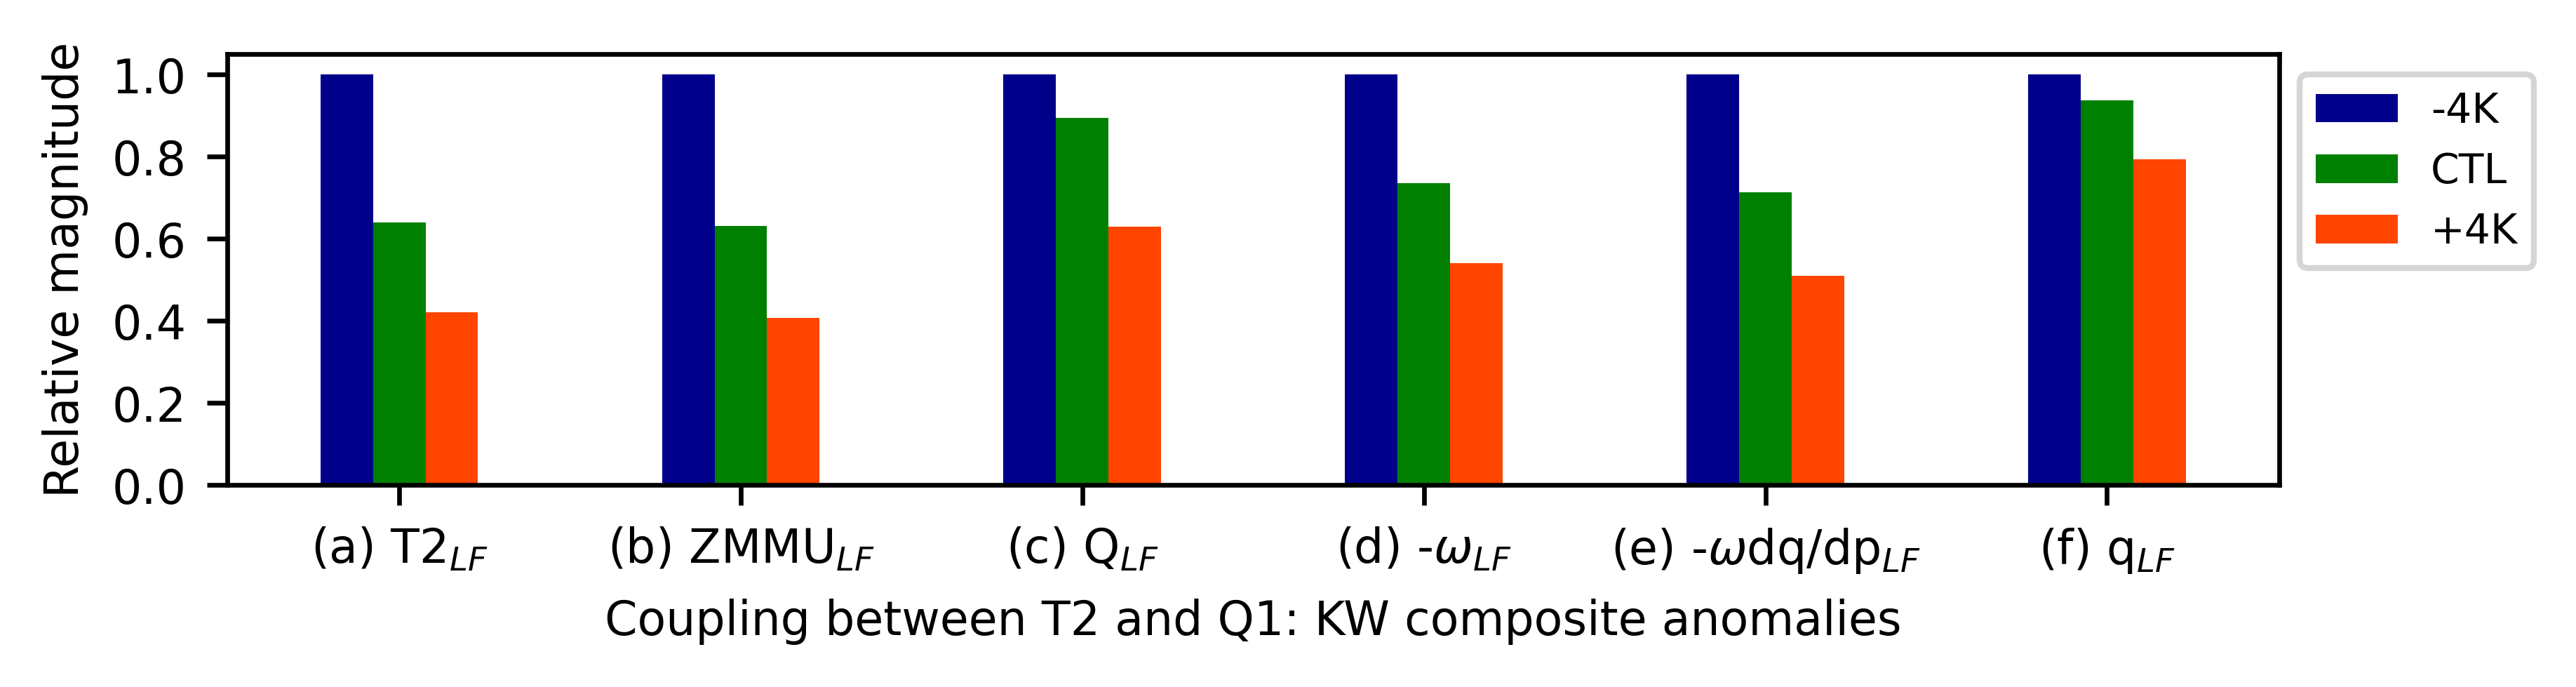

In [23]:
#######################################
# Fig. 11 (plot bar plot to summarize coupling: quantify the magniude of each variable averaged over 750-850 hPa
###################################################
magnitude_lf = np.array([T2_lf_KW_mag_rel, ZMMU_lf_KW_mag_rel, Q_lf_KW_mag_rel,\
                         w_lf_KW_mag_rel, wdqdp_lf_KW_mag_rel, qlf_KW_mag_rel])
print(np.shape(magnitude_lf))

dx_list = np.arange(-1,2,1)
color_list = list(['darkblue','green','orangered'])
legend_list = list(['-4K','CTL','+4K'])

font = 8
# Plot bar plot of relative contribution of each buget term
fig,axes = plt.subplots(1,1,figsize=(6.5, 1.6),dpi=600)
ax = plt.gca()
plt.subplots_adjust(left=0.1,right=0.85,top=0.93,bottom=0.29)
plt.rcParams.update({'font.size': font})
x = np.arange(0, 6.5*6, 6.5)
zero = np.zeros([np.size(x)])
V = magnitude_lf
for icase in range(0,3):
    x_new = x + dx_list[icase]
    plt.bar(x_new, V[:,icase], color=color_list[icase], width=1)
plt.xticks(x,('(a) T2$_{LF}$','(b) ZMMU$_{LF}$','(c) Q$_{LF}$',\
              '(d) -$\omega$$_{LF}$','(e) -$\omega$dq/dp$_{LF}$','(f) q$_{LF}$'),fontsize=8)
ax.legend(legend_list, bbox_to_anchor=(1, 1), loc='upper left',fontsize=7)
plt.xlabel('Coupling between T2 and Q1: KW composite anomalies')
plt.ylabel('Relative magnitude')
plt.yticks(np.arange(0,1.2,0.2))  
plt.savefig(figdir+'Fig.11_T2Q1_coupling_each_term_magnitude.png',dpi=600)
plt.show()

/glade/u/ssg/ch/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: No contour levels were found within the data range.


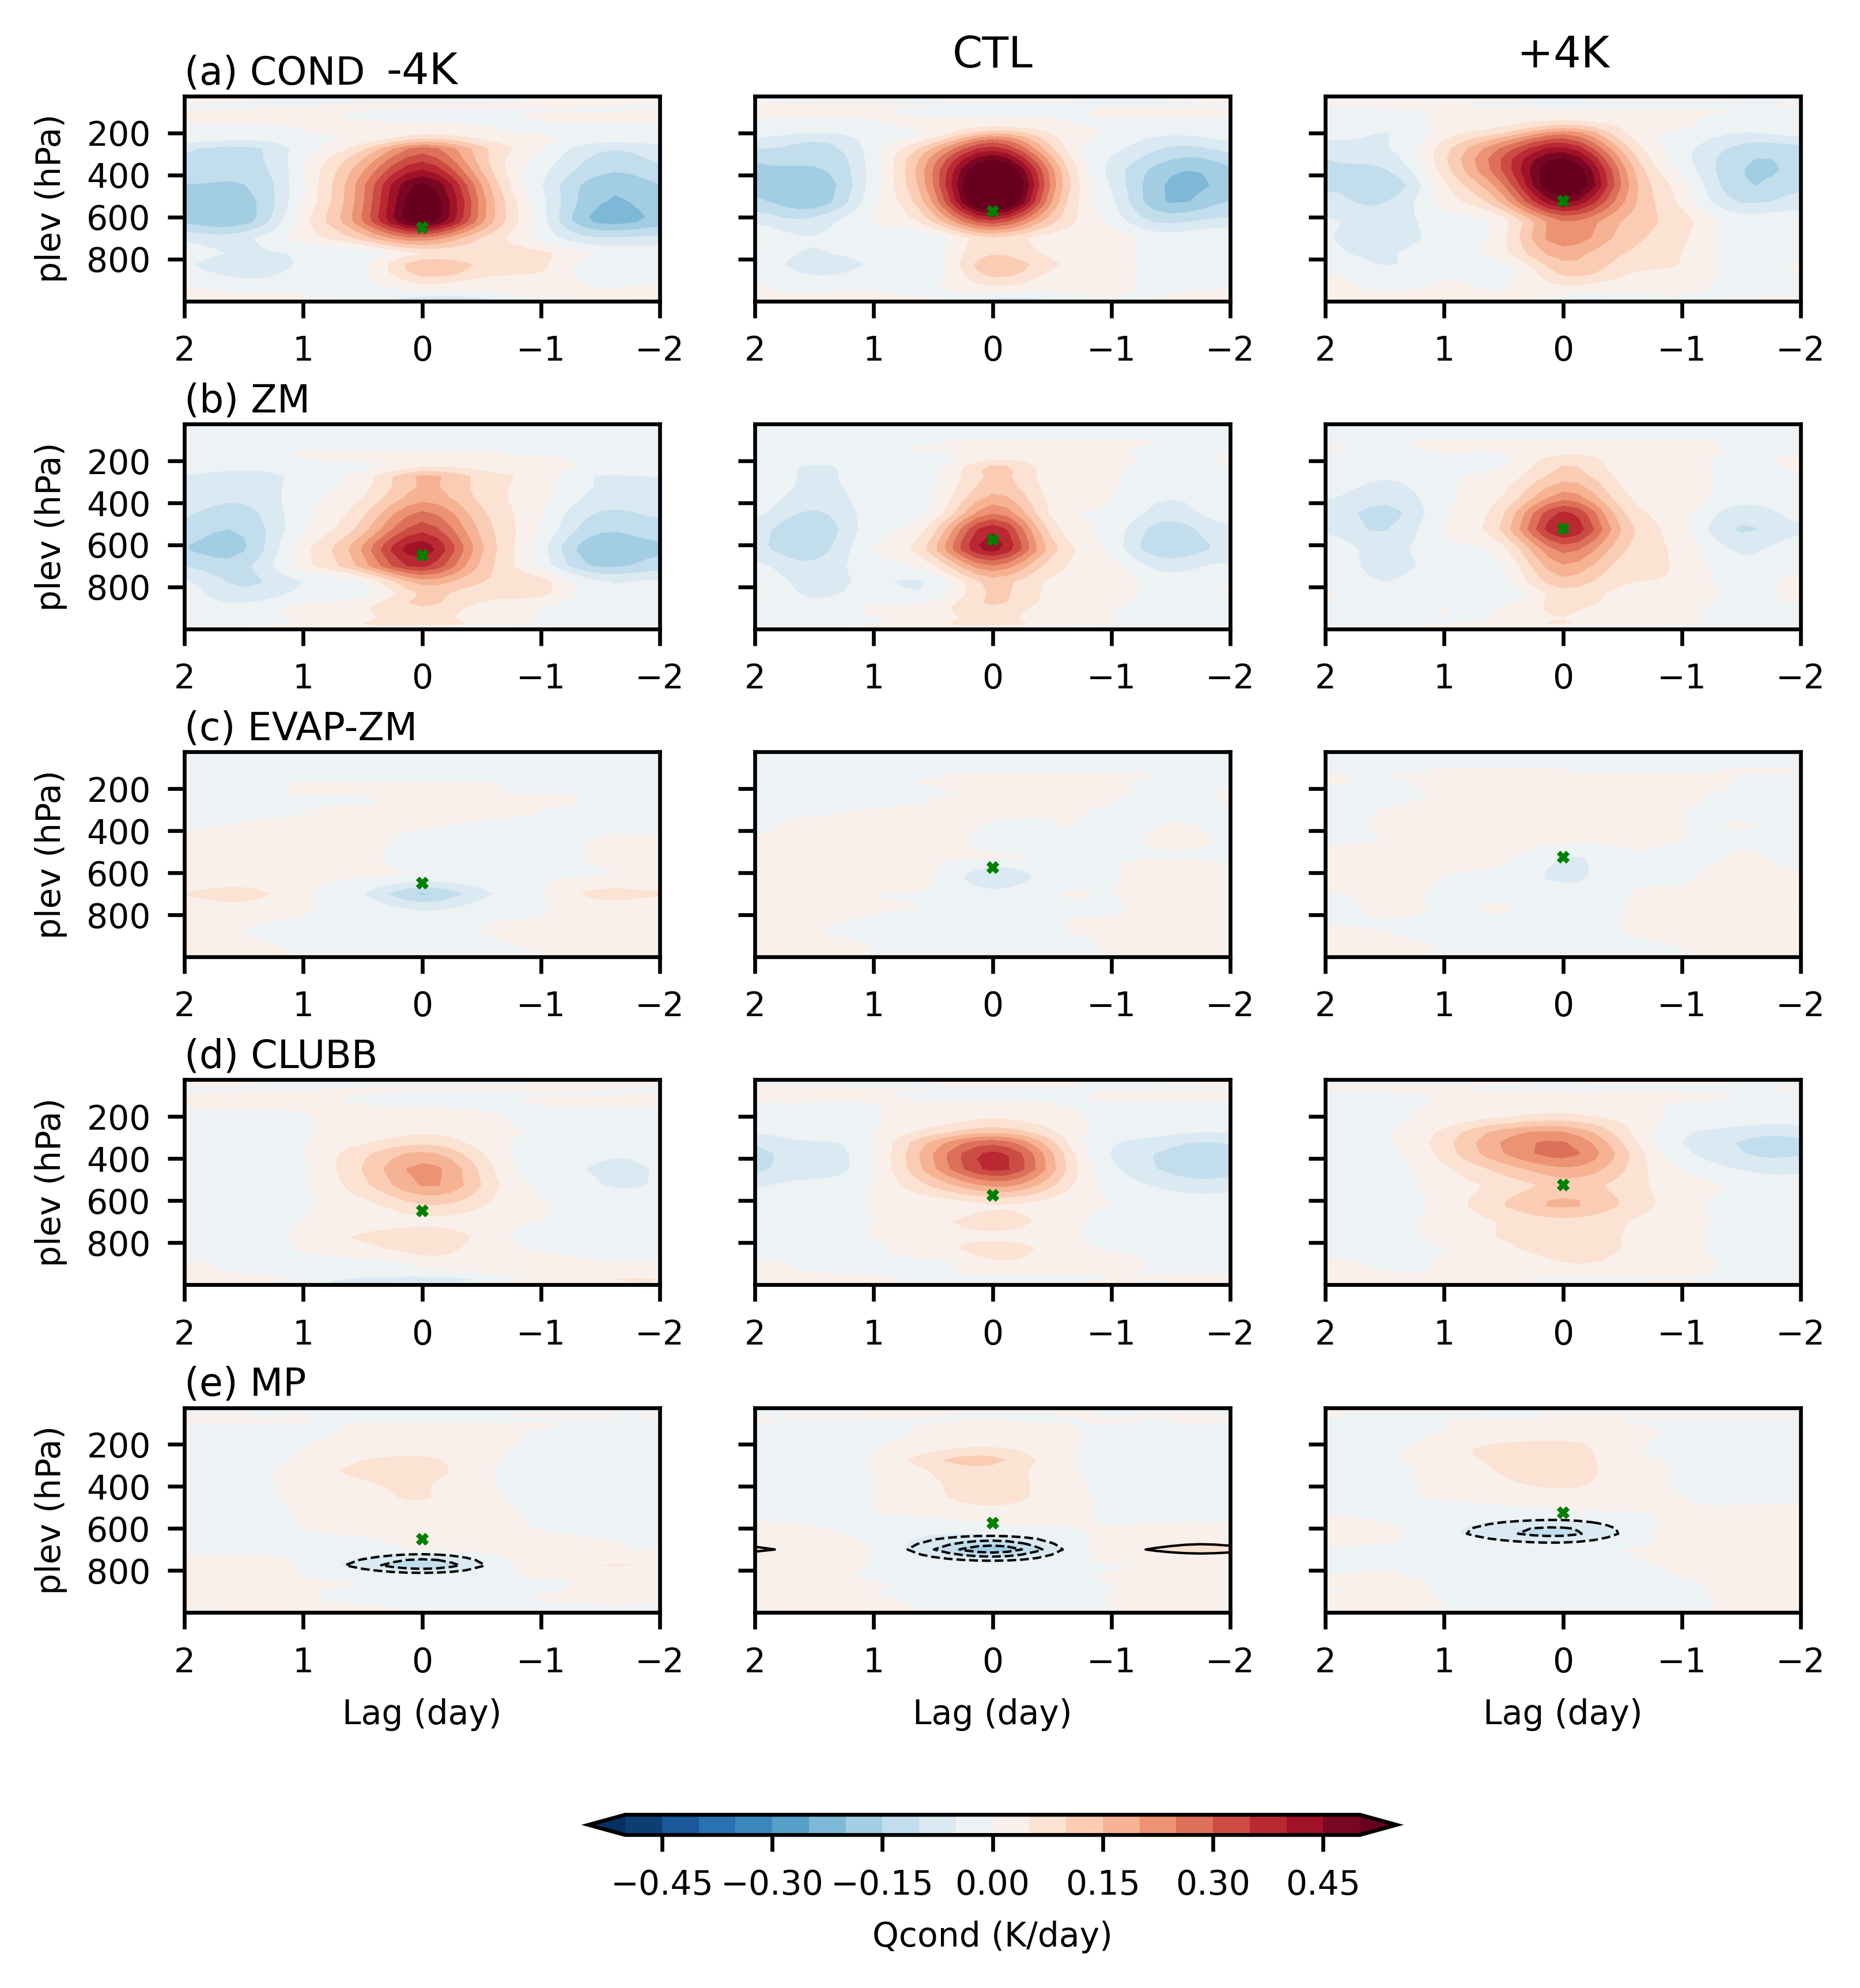

In [25]:
#############################
# Fig. 12: Plot Qcond_lag_plev
######################################
title_list = list(['-4K','CTL','+4K'])
V_list = list(['Qcond','Q_ZM','EVAPT_ZM','Q_CLUBB','Q_MP'])
row_list = list(['(a) COND','(b) ZM','(c) EVAP-ZM','(d) CLUBB','(e) MP'])
clev = np.arange(-10,11,1)/20
clev_n = np.arange(-10,0,1)/20
clev_p = np.arange(1,11,1)/20

font = 7
fig,axes = plt.subplots(5,3,figsize=(5.5, 6.5),dpi=600)
plt.subplots_adjust(left=0.1,right=0.95,top=0.95,bottom=0.05,wspace=0.2, hspace=0.6)
plt.rcParams.update({'font.size': font})
for irow in range(0,5):
    V = globals()[V_list[irow]+'_lag_plev']
    for icase in range(0,3):
        V2 = V[:,:,icase]/pr_var[icase]
        plt.subplot(5,3,icase+1+irow*3)
        if irow == 0:
            plt.title(title_list[icase], pad=6, fontsize=9)
        if icase == 0:
            plt.title(row_list[irow], pad=2.5, loc='left',fontsize=8)
        cf = plt.contourf( xx, yy, V2.T, levels=clev, cmap='RdBu_r', extend='both' )
        if irow == 4:
            cn_n = plt.contour( xx, yy, MELTSDT_lag_plev[:,:,icase].T/pr_var[icase], levels=clev_n, linestyles='dashed',\
                               colors='k',linewidths=0.5)
            cn_p = plt.contour( xx, yy, MELTSDT_lag_plev[:,:,icase].T/pr_var[icase], levels=clev_p,\
                               colors='k',linewidths=0.5)
        plt.plot( [0,0],[plev_m[ilev_melt[icase]],plev_m[ilev_melt[icase]]], 'green',marker='x', markersize=2)#, linewidth=0.3)
        ax = plt.gca()
        if irow == 4:
            plt.xlabel('Lag (day)')
        plt.yticks(np.arange(200,1000,200))
        plt.gca().invert_yaxis()
        plt.tick_params(bottom=True,top=False,left=True,right=False)

        if icase == 0:
            plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
            ax.set_ylabel('plev (hPa)',fontsize=font)
        else:
            plt.tick_params(labelbottom=True,labeltop=False,labelleft=False,labelright=False)
        plt.xlim([-2,2])
        plt.xticks(np.arange(-2,3,1))
        plt.gca().invert_xaxis()
        if icase == 2 and irow==4:
            cb = plt.colorbar(cf, ax = axes[:,:], orientation = 'horizontal', shrink=.5, aspect=40,pad=0.1) 
            cb.set_label('Qcond (K/day)')
            cb.ax.tick_params(labelsize=7)
            #cb.set_ticks(ticks)
          
plt.savefig(figdir+'Fig.12_Q1_lag_plev_melt.png',dpi=600)  
plt.show()

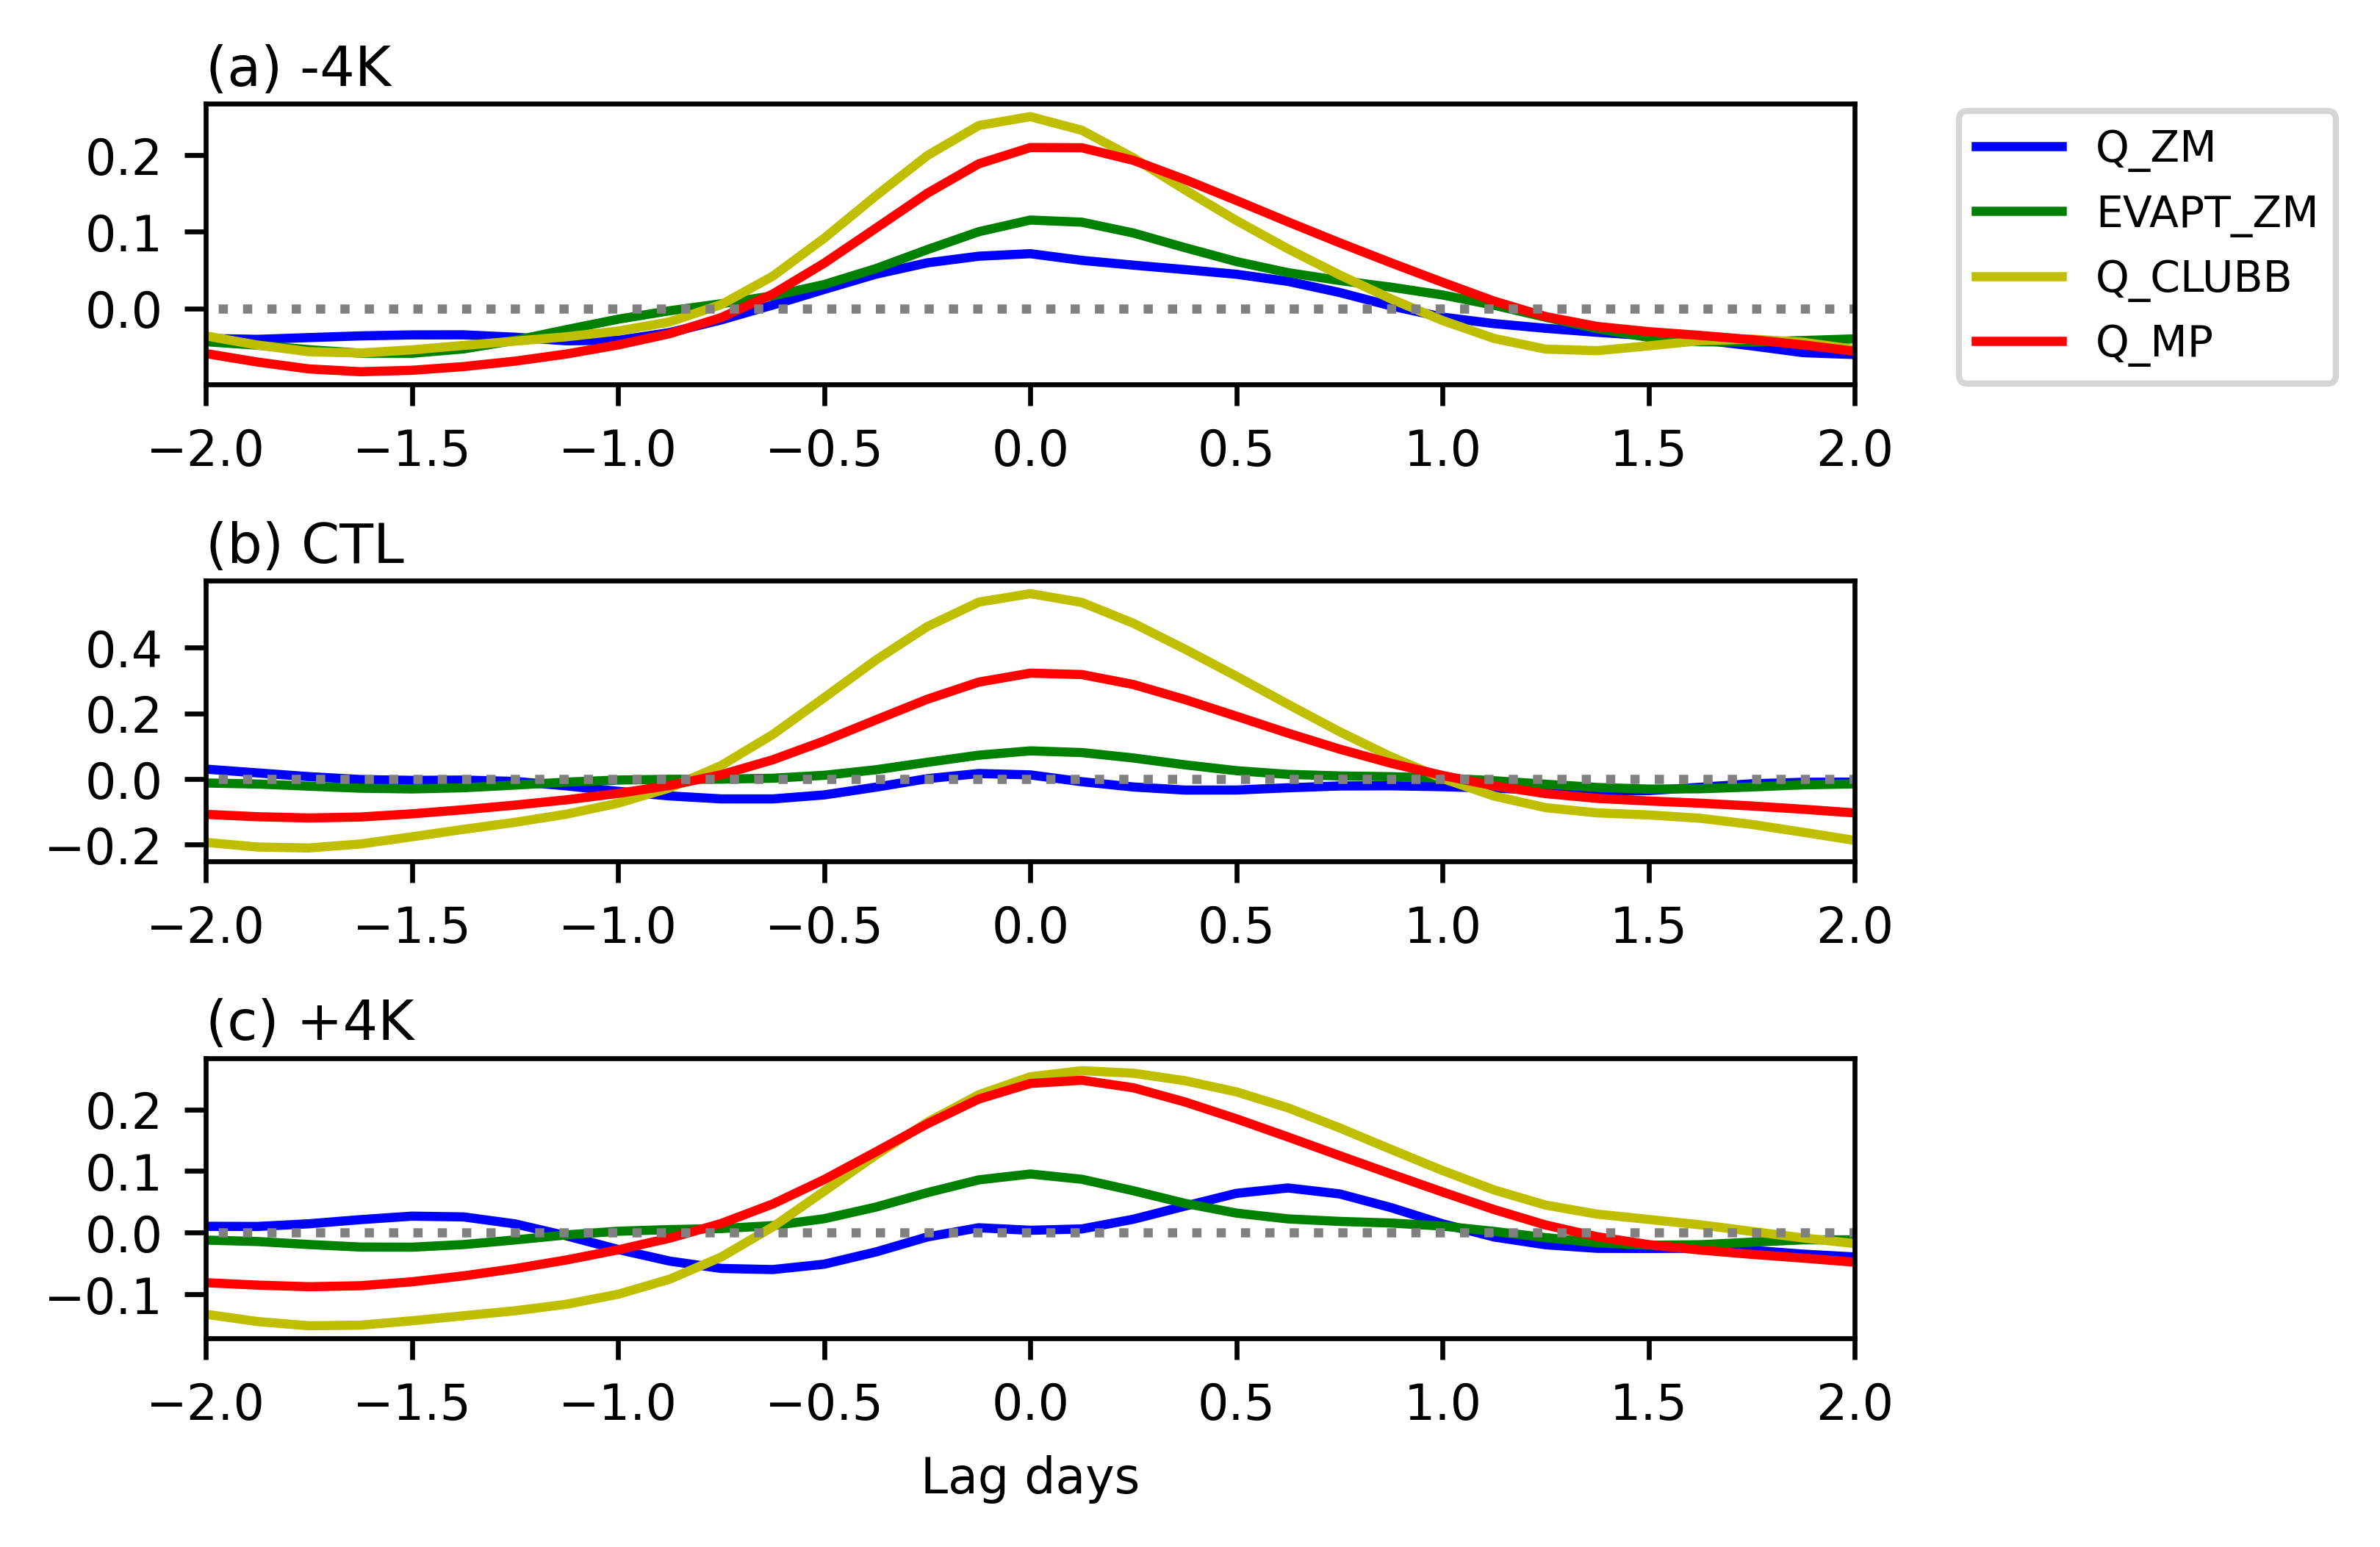

In [29]:
##########################################
# Fig. 13: PLot timeseries of each term projected onto EOF2
###########################################
vname_list = list(['Q_ZM','EVAPT_ZM','Q_CLUBB','Q_MP'])
color_list_spec = list(['b','g','y','r'])
title_list = list(['(a) -4K','(b) CTL','(c) +4K'])
font = 8
zero = np.zeros([np.size(lags)])
fig,axes = plt.subplots(3,1,figsize=(5.5, 4),dpi=600)
plt.subplots_adjust(left=0.1,right=0.78,top=0.9,bottom=0.2,wspace=0.2, hspace = 0.7)
plt.rcParams.update({'font.size': font})
for icase in range(0,3):
    plt.subplot(3,1,icase+1)
    for iplt in range(0, np.size(vname_list)):
        V = globals()[vname_list[iplt]+'_lag_plev_EOF2']
        #print(np.shape(V))
        #print(np.shape(lags))
        plt.plot(lags/8, V[:,icase], color=color_list_spec[iplt])
        
        plt.xlim([-2,2])
        if iplt == 0:
            plt.title(title_list[icase], pad=3, loc='left',fontsize=9)
    if icase == 0:    
        plt.yticks(np.arange(-0.1,0.3,0.1))
        ax = plt.gca()
        ax.legend(vname_list, bbox_to_anchor=(1.05, 1.05), loc='upper left',fontsize=7)
    elif icase == 1:
        plt.yticks(np.arange(-0.2,0.6,0.2))
    elif icase == 2:
        plt.yticks(np.arange(-0.1,0.3,0.1))
        plt.xlabel('Lag days')
    plt.plot(lags/8, zero, color='grey',linestyle=':' )
        
plt.savefig(figdir+'Fig.13_DTCOND_eof_proj_timeseries.png',dpi=600)  
plt.show()

[650 575 525]


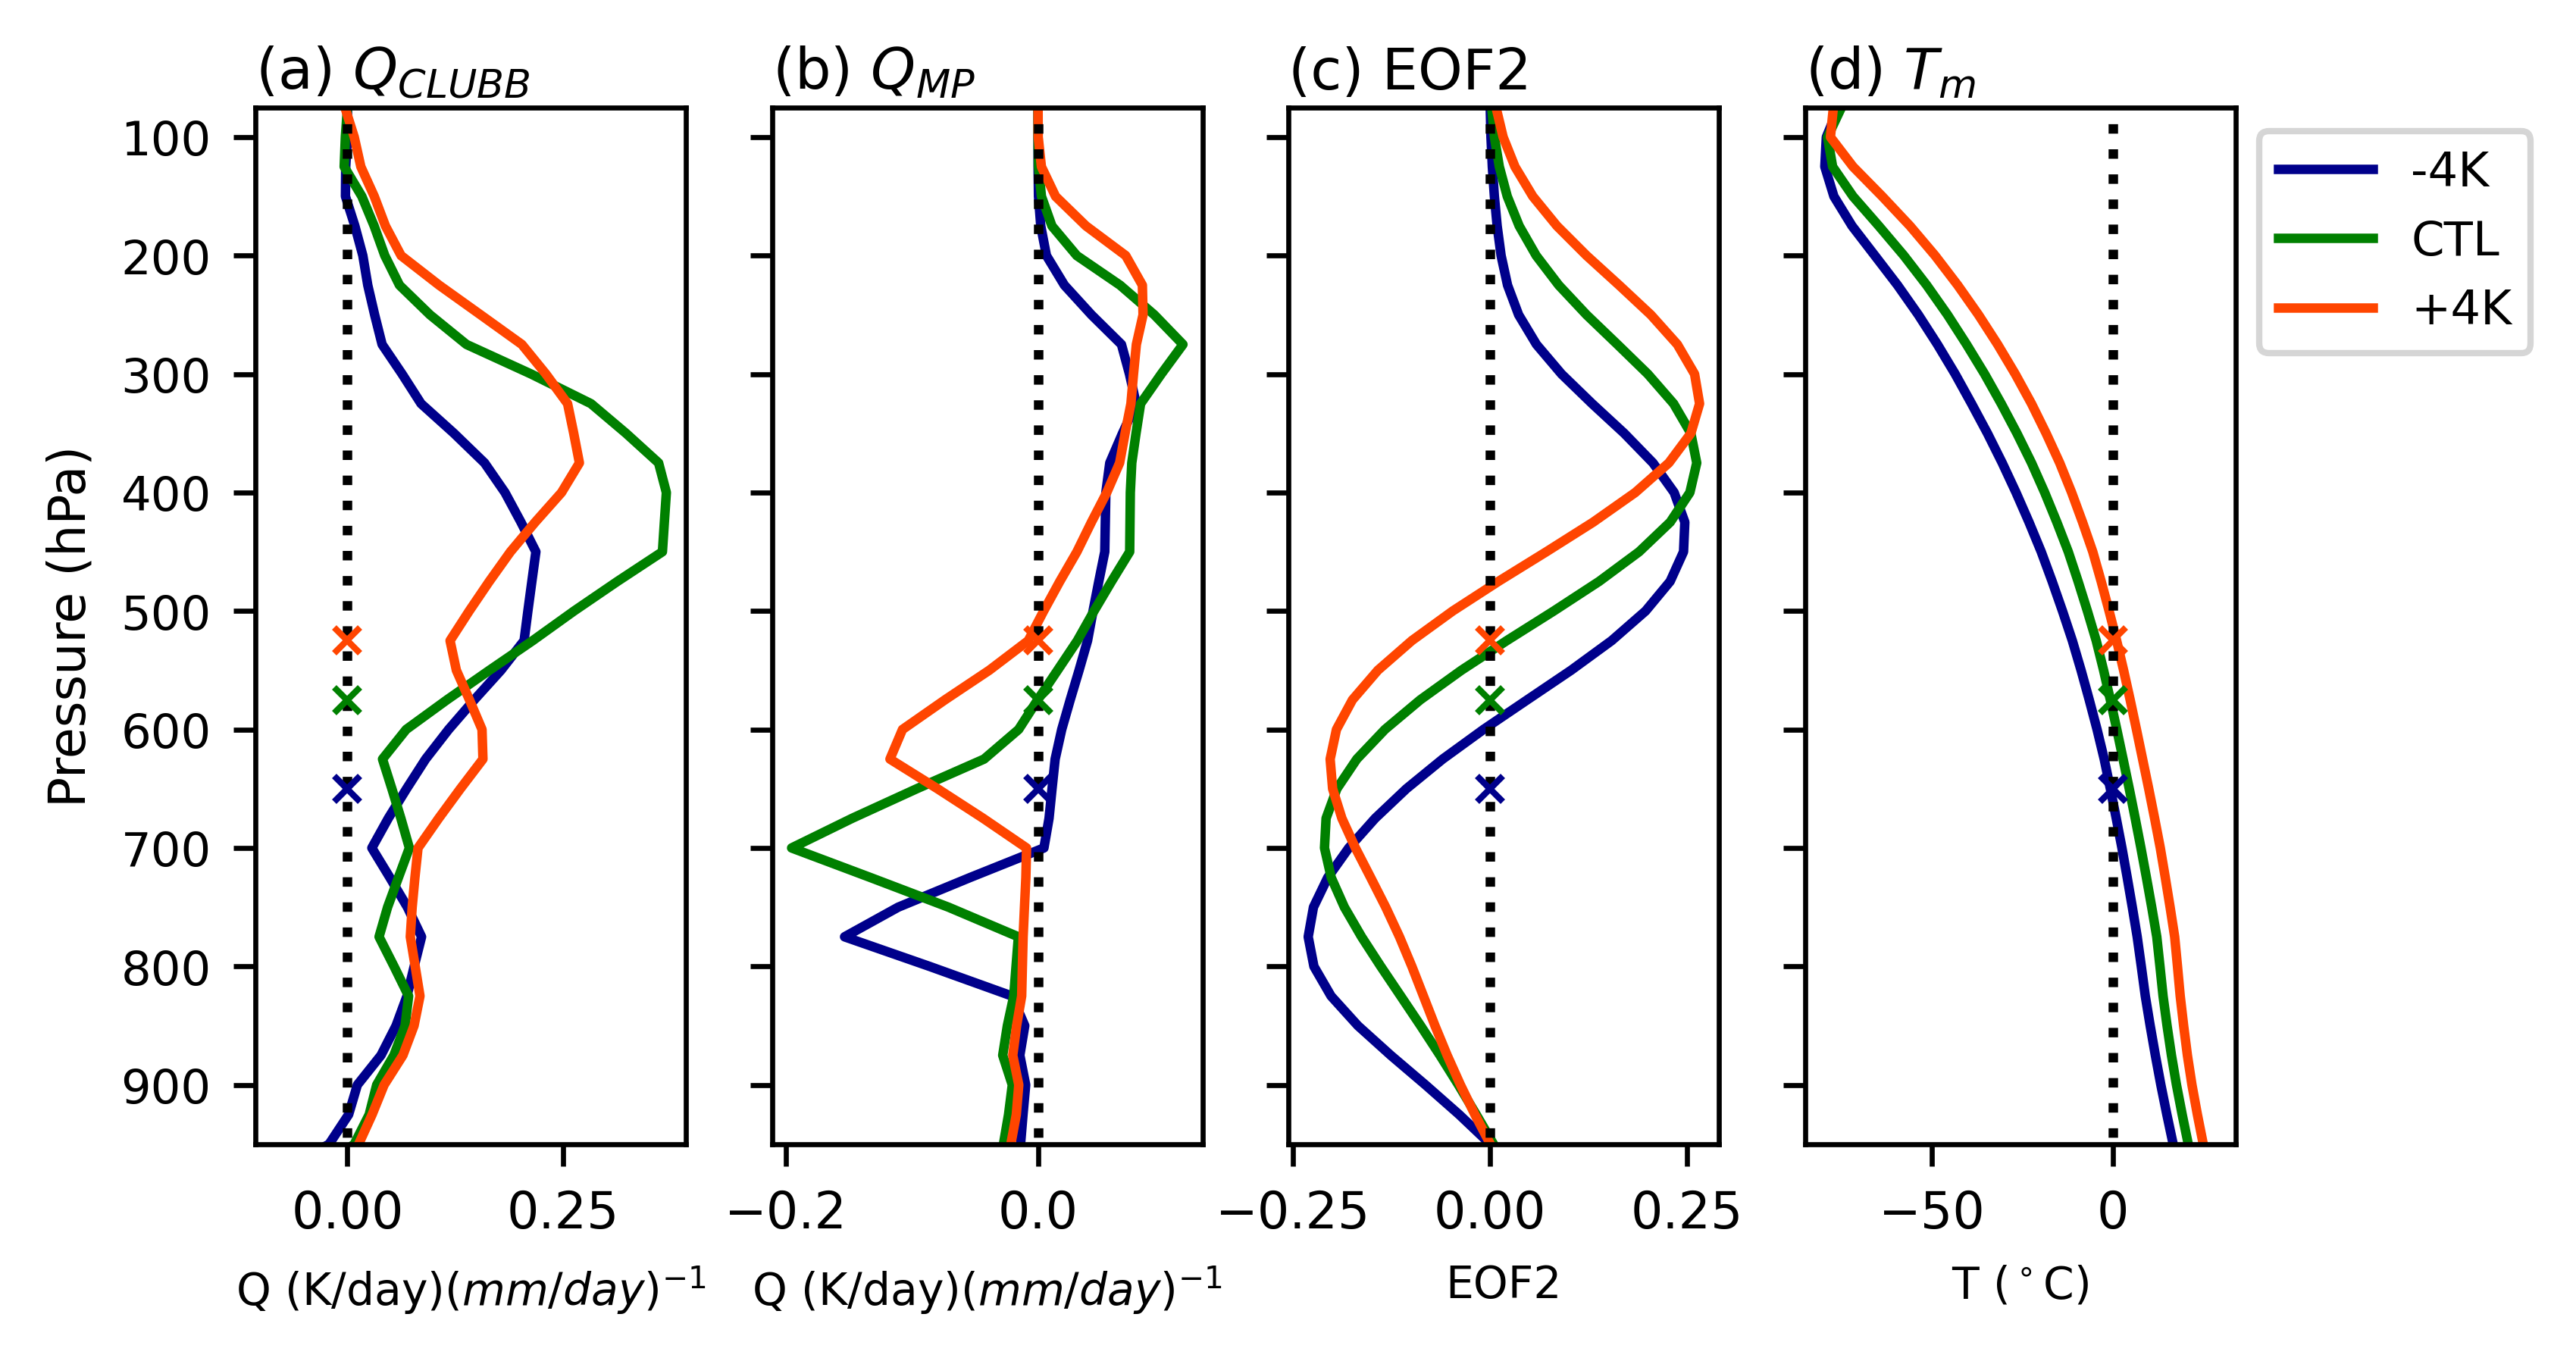

In [31]:
###############################
# Fig. 14: Plot 4 figures together
################################
mark_melting_level=1
for icase in range(0,3):
    if icase == 0:
        ilev_melt = np.zeros([3]).astype('int')
    ilev_melt[icase] = int(np.argwhere(np.abs(Tm[:,icase])==np.min(np.abs(Tm[:,icase]))).squeeze())
print(plev_m[ilev_melt])

title = list(['(a) $Q_{CLUBB}$','(b) $Q_{MP}$','(c) EOF2','(d) $T_{m}$'])
xlabel_list = list(['Q (K/day)$(mm/day)^{-1}$','Q (K/day)$(mm/day)^{-1}$','EOF2','T ($^\circ$C)'])
font = 8
fig,axes = plt.subplots(1,4,figsize=(6.5, 3),dpi=600)
plt.subplots_adjust(left=0.15,right=0.82,top=0.91,bottom=0.15,wspace=0.2)
plt.rcParams.update({'font.size': font})
zero = np.zeros([nlev])
vname = list(['Q_CLUBB_lag0_plev','Q_MP_lag0_plev','EOF2','Tm'])#'Tm_10SN'])
for iplt in range(0,4):
    plt.subplot(1,4,iplt+1)
    ax = plt.gca()
    V = globals()[vname[iplt]]
    if iplt == 0 or iplt == 1:
        V = V/pr_var

    for icase in range(0,3):
        plt.plot(V[:,icase], plev, color=color_list[icase])

    plt.plot(zero, plev,'k:')
    plt.tick_params(bottom=True,top=False,left=True,right=False)
    plt.ylim([75, 950]) 
    plt.yticks(np.arange(100,1000,100),fontsize=7.5)
    if iplt == 3:
        ax.legend(['-4K','CTL','+4K'],bbox_to_anchor=(1, 1), loc='upper left',fontsize=7.5)
    plt.gca().invert_yaxis()
    plt.title(title[iplt], pad=3, loc='left',fontsize=9)
    if iplt == 0:
        plt.ylabel('Pressure (hPa)')
        plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
    else:
        plt.tick_params(labelbottom=True,labeltop=False,labelleft=False,labelright=False)
    plt.xlabel(xlabel_list[iplt],fontsize=7)
    
    # Mark melting level:
    if mark_melting_level == 1:
        for icase in range(0,3):
            plt.plot( 0, plev_m[ilev_melt[icase]], color=color_list[icase], marker='x',markersize=4)
    #
plt.savefig(figdir+'Fig.14_plev_CLUBB_MP_EOF2_T.png',dpi=600)
plt.show()

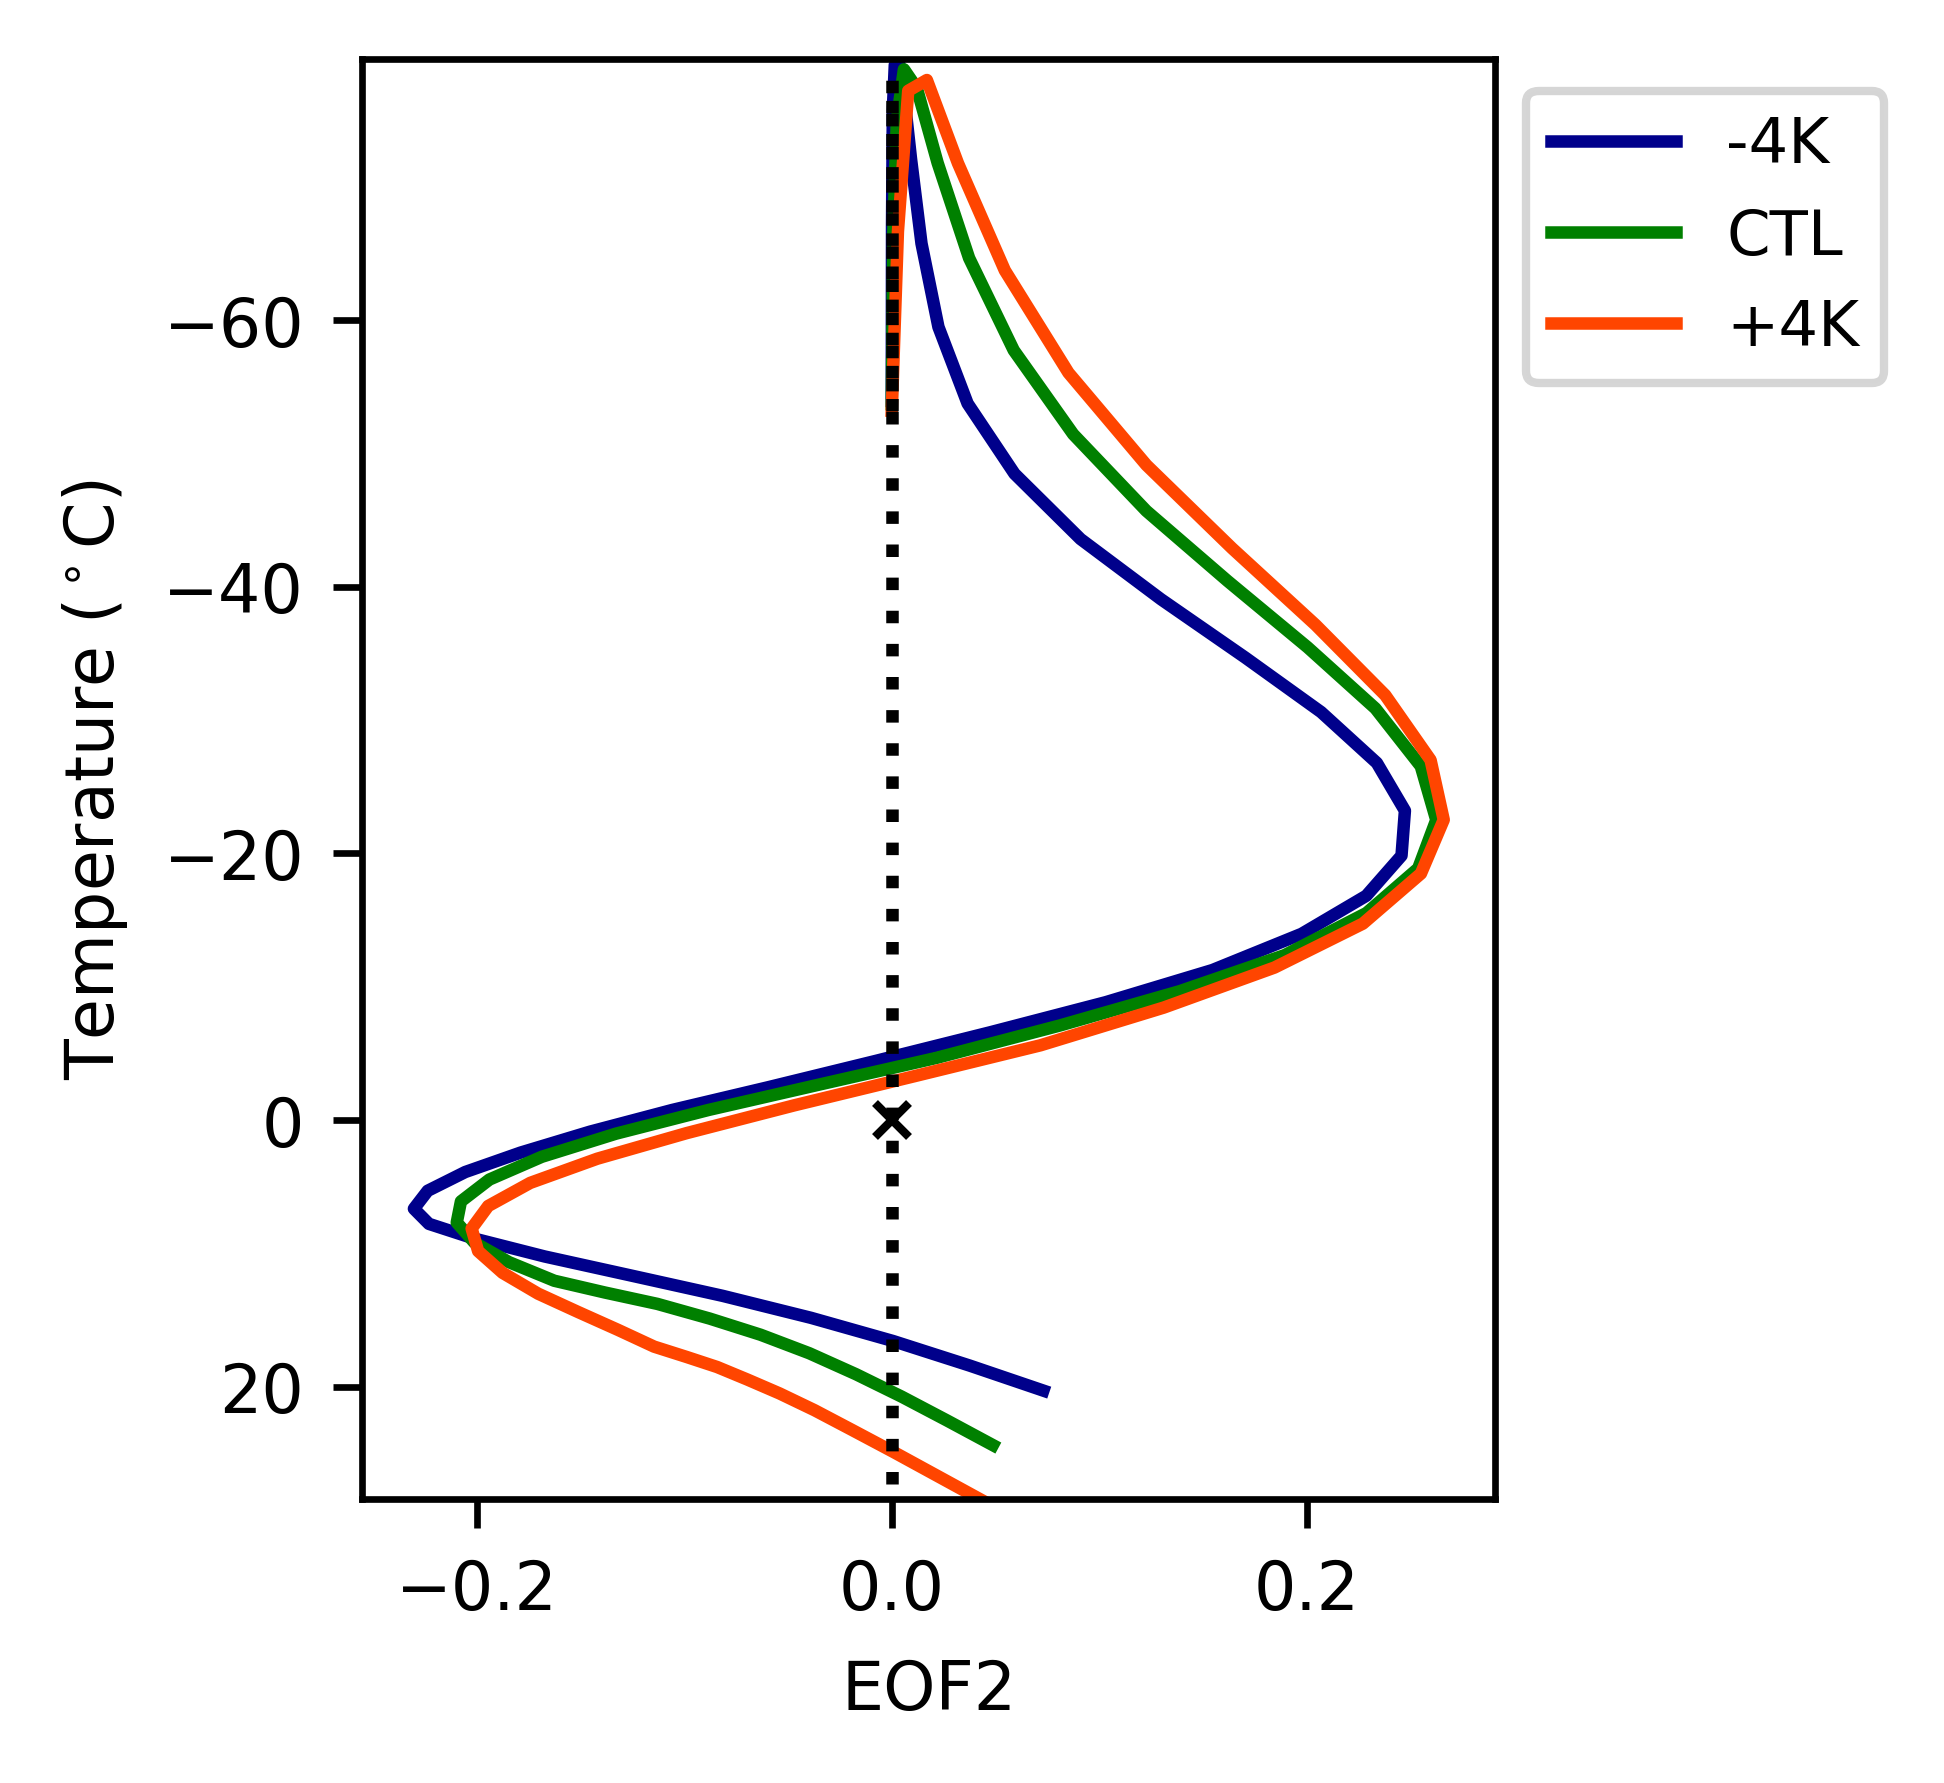

In [34]:
###########################
# Plot EOF2 with temperature on the y-axis
########################
title = list(['EOF2'])
font = 8
fig,axes = plt.subplots(1,1,figsize=(3.2, 3),dpi=600)
plt.subplots_adjust(left=0.17,right=0.76,top=0.95,bottom=0.15,wspace=0.2)
plt.rcParams.update({'font.size': font})
zero = np.zeros([nlev])
#plev_mid = (np.max(plev)+np.min(plev))/2
vname = list(['EOF2'])#'Tm_10SN'])
for iplt in range(0,1):
    plt.subplot(1,1,iplt+1)
    ax = plt.gca()
    V = globals()[vname[iplt]]
    for icase in range(0,3):
        plt.plot(V[:,icase], Tm[:,icase], color=color_list[icase])
    plt.plot(zero, Tm[:,icase],'k:')
    plt.tick_params(bottom=True,top=False,left=True,right=False)
    plt.ylim([np.min(Tm), np.max(Tm)])
    if iplt == 0:
        ax.legend(['-4K','CTL','+4K'],bbox_to_anchor=(1, 1), loc='upper left',fontsize=7.5)
    plt.gca().invert_yaxis()
    plt.xlabel('EOF2')
    if iplt == 0:
        plt.ylabel('Temperature ($^\circ$C)')
        plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
    else:
        plt.tick_params(labelbottom=True,labeltop=False,labelleft=False,labelright=False)
    # Mark melting level:
    plt.plot(0,0,color='k', marker='x',markersize=4)
plt.savefig(figdir_supplement+'Fig.S6_EOF2_T-for-y-axis.png',dpi=600)
plt.show()